<a href="https://colab.research.google.com/github/ammusin/Respiratory_disease_detection/blob/main/RestNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkarmanohardalvi/lungs-disease-dataset-4-types")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lungs-disease-dataset-4-types


In [ ]:
import os
base_path = '/kaggle/input/lungs-disease-dataset-4-types'

print(os.listdir(base_path))

['Lung Disease Dataset']


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. Data Augmentation
train_gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.5],
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255
)
val_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

# 2. Data Loading
train_data = train_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'train'),
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=128,
    shuffle=True
)

val_data = val_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'val'),
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=128,
    shuffle=True
)

test_data = test_gen.flow_from_directory(
    os.path.join(base_path, 'Lung Disease Dataset', 'test'),
    target_size=(128, 128),
    color_mode="rgb",
    batch_size=128,
    shuffle=False
)

# 3. Model Building (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(5, activation='softmax')
])

model.summary()

# 4. Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Early Stopping
early_stopping = EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True)

# 6. Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stopping]
)


Found 6054 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,597,957 (90.02 MB)

 Trainable params: 23,544,837 (89.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.5902 - loss: 1.0377 - val_accuracy: 0.2014 - val_loss: 2.5157
Epoch 2/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8289 - loss: 0.4242 - val_accuracy: 0.2014 - val_loss: 2.7976
Epoch 3/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8458 - loss: 0.3836 - val_accuracy: 0.2014 - val_loss: 4.8793
Epoch 4/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8675 - loss: 0.3409 - val_accuracy: 0.2014 - val_loss: 3.2599
Epoch 5/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8700 - loss: 0.3143 - val_accuracy: 0.2014 - val_loss: 5.4267
Epoch 6/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8618 - loss: 0.3307 - val_accuracy: 0.2014 - val_loss: 5.1838
Epoch 7/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8711 - loss: 0.3009 - val_accuracy: 0.2014 - val_loss: 6.4639
Epoch 8/40
48/48 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8801 - loss: 0.2824 - val_accuracy: 0.1071 - val_los

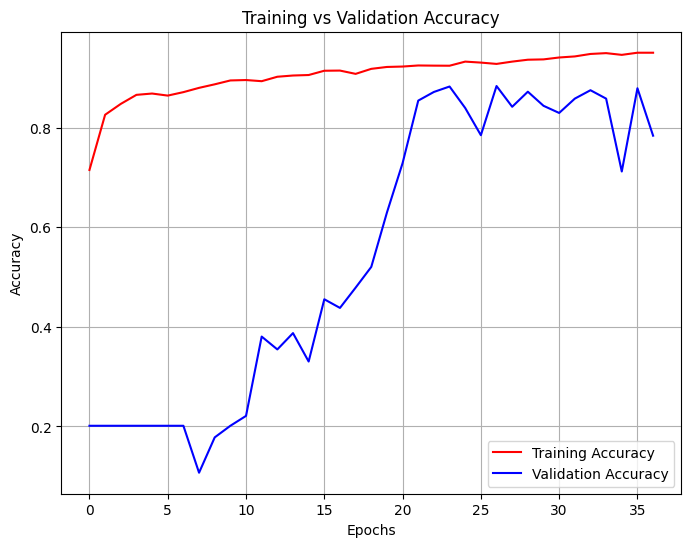

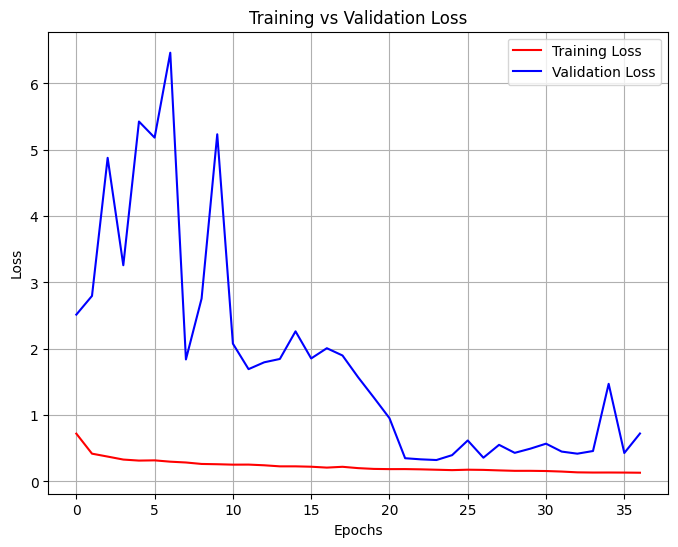

In [ ]:
import matplotlib.pyplot as plt

# Plot 1: Training vs Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Training vs Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: Tuberculosis


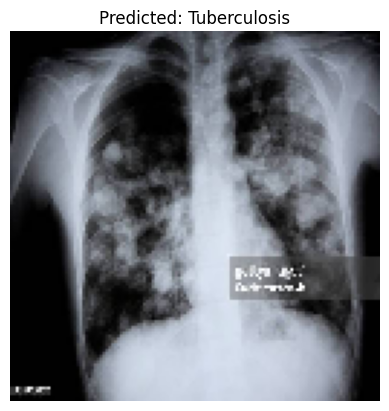

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your image (use RGB not grayscale)
img_path = '/content/4.jpg'  # 🔥 Change this to your image path
img = image.load_img(img_path, target_size=(128, 128), color_mode="rgb")

# 2. Convert to array
img_array = image.img_to_array(img)

# 3. Normalize
img_array = img_array / 255.0

# 4. Expand dimensions (model expects batch input)
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 128, 128, 3)

# 5. Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# 6. Map the prediction back to class name
class_labels = list(test_data.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class[0]]}")

# 7. Visualize the image
plt.imshow(img_array[0])  # No squeeze needed for RGB
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
